# 数据可视化

## 离散型数据可视化

### 饼图

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, labeldistance=1.1)  
x：指定绘图数据  
explode：指定饼图某些部分的突出显示，即呈现爆炸式
labels：为饼图添加标签说明，类似于图例说明  
colors：指定饼图的填充色  
autopct：自动添加百分比显示，可以采用格式化的方法显示  
pctdistance：设置百分比标签与圆心的距离  
labeldistance：设置各扇形标签（图例）与同心圆的距离  

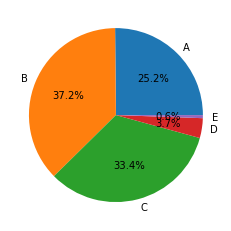

In [15]:
import matplotlib.pyplot as plt
edu=[0.2515, 0.3724, 0.3336, 0.0368, 0.0057]
labels = ['A', 'B', 'C', 'D', 'E']
plt.pie(x=edu, labels=labels, autopct='%.1f%%')#设置百分比的格式，这里保留一位小数
plt.show()

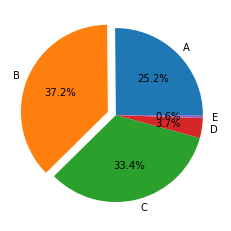

In [17]:
import matplotlib.pyplot as plt
edu=[0.2515, 0.3724, 0.3336, 0.0368, 0.0057]
labels = ['A', 'B', 'C', 'D', 'E']
explode = [0, 0.1, 0, 0, 0]
plt.pie(x=edu, labels=labels, explode=explode, autopct='%.1f%%')#设置百分比的格式，这里保留一位小数
plt.show()

### 条形图
离散型变量的数量比较多  


bar(x, height, width=0.8, bottom=None, color=None, edgecolor=None, tick_label=None, ecolor=None)  
x：传递数值序列， 指定条形图中x轴上的刻度值  
height：指定数值序列，指定条形图Y轴上的高度  
width：指定条形图的宽度，默认为0.8  
bottom：用于绘制堆叠条形图  
color：指定条形图的填充色  
edgecolor：指定条形图的边框色  
tick_label：指定条形图的刻度标签  
label：指定条形图的标签，一般用以添加图例

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import matplotlib    
matplotlib.get_cachedir()

'/home/ploaron/.cache/matplotlib'

#### 常规条形图

In [2]:
gdp = pd.read_excel(r"./data_for_pandas/Province GDP 2017.xlsx")
gdp

,Province,GDP
0,北京,2.80
1,上海,3.01
2,广东,8.99
3,江苏,8.59
4,重庆,1.95
5,天津,1.86


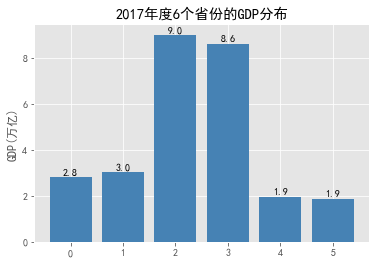

In [3]:
plt.style.use('ggplot')#设置绘图风格，使用R语言中的ggplot2的风格
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#绘制条形图
plt.bar(x = range(gdp.shape[0]),#指定条形图的x轴的刻度值
        height = gdp.GDP, #指定条形图y轴的数值
        color = 'steelblue'#条形图的填充色
        
       )
#添加y轴标签
plt.ylabel('GDP(万亿)')
#添加条形图的标题
plt.title("2017年度6个省份的GDP分布")
#为每个条形图添加数值标签
for x, y in enumerate(gdp.GDP):
    plt.text(x, y+0.1, '%s'%round(y, 1), ha='center')
#plt.savefig('test.png', format='png')
plt.show()

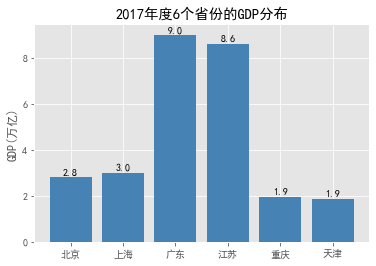

In [4]:
plt.style.use('ggplot')
plt.bar(x = range(gdp.shape[0]),
        height = gdp.GDP, 
        color = 'steelblue',
        tick_label = gdp.Province#指定x轴的刻度标签
       )

plt.ylabel('GDP(万亿)')

plt.title("2017年度6个省份的GDP分布")

for x, y in enumerate(gdp.GDP):
    plt.text(x, y+0.1, '%s'%round(y, 1), ha='center')

plt.show()

#### 横向条形图

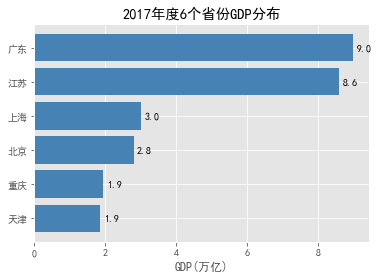

In [8]:
#对读入数据升序排列
gdp.sort_values(by='GDP', inplace=True)
#绘制水平条形图
plt.barh(y = range(gdp.shape[0]), width=gdp.GDP, tick_label=gdp.Province, color='steelblue')
plt.xlabel('GDP(万亿)')
plt.title("2017年度6个省份GDP分布")
for y,x in enumerate(gdp.GDP):
    plt.text(x+0.1, y, '%s'%round(x,1), va='center')
plt.show()


In [9]:
for y,x in enumerate(gdp.GDP):#生成一个元组，包括（索引，数值）
    print(x, y)

1.86 0
1.95 1
2.8 2
3.01 3
8.59 4
8.99 5


#### 交错条形图

In [10]:
hunrun = pd.read_excel("./data_for_pandas/HuRun.xlsx")
hunrun

,Year,Counts,City
0,2016,15600,北京
1,2016,12700,上海
2,2016,11300,香港
3,2016,4270,深圳
4,2016,3620,广州
5,2017,17400,北京
6,2017,14800,上海
7,2017,12000,香港
8,2017,5200,深圳
9,2017,4020,广州


In [13]:
#pandas透视表的分组和计数
hunrun_reshape = hunrun.pivot_table(index='City', columns='Year', values='Counts').reset_index()
hunrun_reshape

Year,City,2016,2017
0,上海,12700,14800
1,北京,15600,17400
2,广州,3620,4020
3,深圳,4270,5200
4,香港,11300,12000


In [14]:
#对数据集进行降序排列
hunrun_reshape.sort_values(by=2016, ascending=False, inplace=True)
hunrun

,Year,Counts,City
0,2016,15600,北京
1,2016,12700,上海
2,2016,11300,香港
3,2016,4270,深圳
4,2016,3620,广州
5,2017,17400,北京
6,2017,14800,上海
7,2017,12000,香港
8,2017,5200,深圳
9,2017,4020,广州


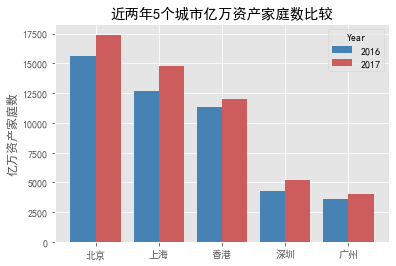

In [15]:
#绘制交错条形图
hunrun_reshape.plot(x='City', y=[2016, 2017], kind='bar',
                   color=['steelblue', 'indianred'],
                   rot=0,#用于设置x轴刻度标签的角度， 0表示水平显示刻度标签
                   width=0.8, title='近两年5个城市亿万资产家庭数比较')

plt.ylabel('亿万资产家庭数')
plt.xlabel('')
plt.show()

### venn图  
包： matplotlib-venn  
安装：conda install -c conda-forge matplotlib-venn  
参考链接：https://zhuanlan.zhihu.com/p/195541937  

In [1]:
import matplotlib.pyplot as plt

#### venn2

In [2]:
from matplotlib_venn import venn2,venn2_circles

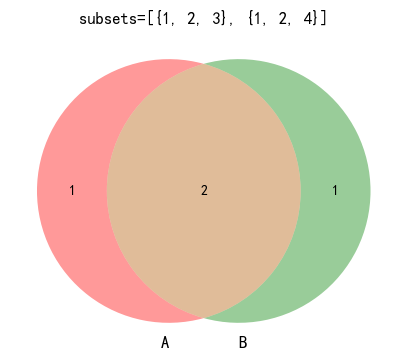

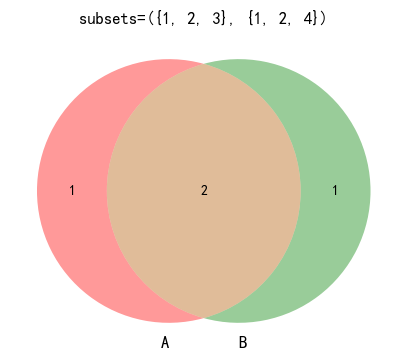

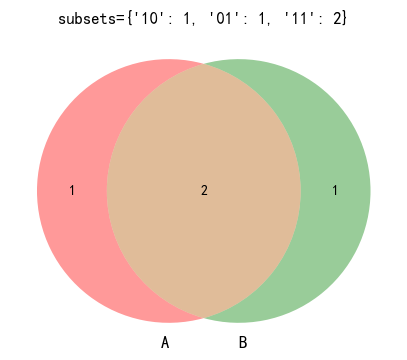

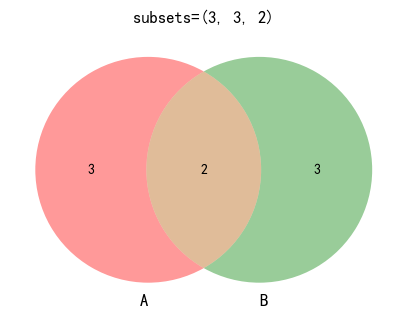

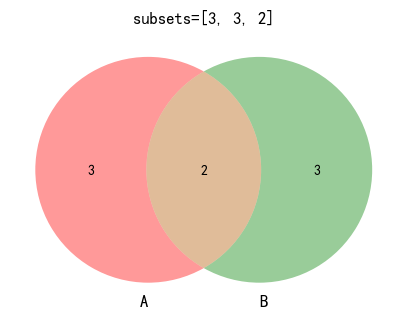

In [3]:
#subsets参数
subset = [[{1,2,3}, {1, 2, 4}],#list[set_1, set_2]
          ({1,2,3}, {1, 2, 4}),#tuple(set_1, set_2)
          {"10":1, "01":1, "11":2},#dict(onlyA, onlyB, bothAB)
          (3, 3, 2),##tuple(haveA, haveB, bothAB)
          [3, 3, 2]#list[haveA, haveB, bothAB]
         ]
for i in subset:
    my_dpi=100
    plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)
    g=venn2(subsets=i)#绘制默认venn图
    plt.title('subsets=%s'%str(i))
    plt.show()

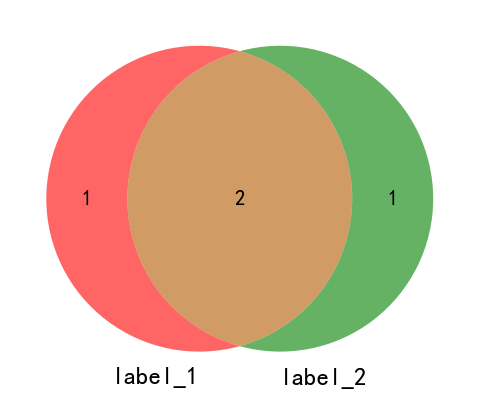

In [6]:
my_dpi=150
plt.figure(figsize=(580/my_dpi, 580/my_dpi), dpi=my_dpi)#控制图尺寸，提高分辨率
g=venn2(subsets=[{1, 2, 3}, {1, 2, 4}],#绘图数据集
       set_labels=("label_1", "label_2"),#设置组名
        alpha=0.6,#设置透明度
        normalize_to=1.0,#venn图占据figure的比例，1.0为占满
       )
plt.show()

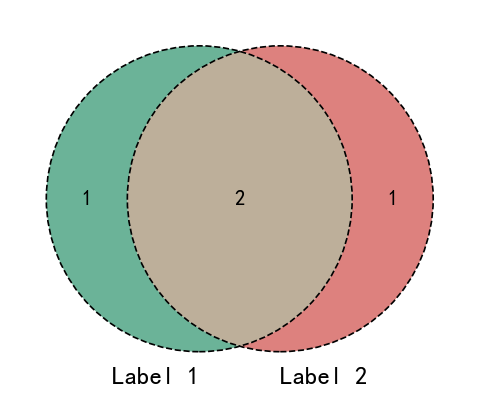

In [7]:
#外圈属性
my_dpi=150
plt.figure(figsize=(580/my_dpi, 580/my_dpi), dpi=my_dpi)
g=venn2(subsets = [{1,2,3},{1,2,4}],
        set_labels = ('Label 1', 'Label 2'),
        set_colors=("#098154","#c72e29"),
        alpha=0.6,
        normalize_to=1.0,
       )
g=venn2_circles(subsets=[{1, 2, 3},{1, 2, 4}],
               linestyle="--", linewidth=0.8, color="black"#外框线形，线宽，颜色
               )
plt.show()

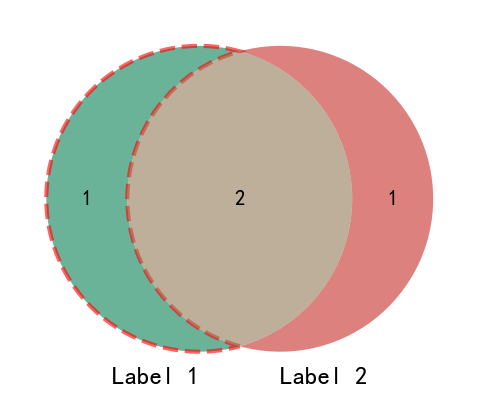

In [9]:
#单圈属性设置
#g.get_patch_by_id("10")返回一个matplotlib.patches.Patch对象，有多个参数可以调节
my_dpi=150
plt.figure(figsize=(580/my_dpi, 580/my_dpi), dpi=my_dpi)
g=venn2(subsets = [{1,2,3},{1,2,4}],
        set_labels = ('Label 1', 'Label 2'),
        set_colors=("#098154","#c72e29"),
        alpha=0.6,
        normalize_to=1.0,
       )
g.get_patch_by_id("10").set_edgecolor("red")#外框颜色
g.get_patch_by_id("10").set_linestyle("--")#外框线型
g.get_patch_by_id("10").set_linewidth(2)#外框线宽


findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.


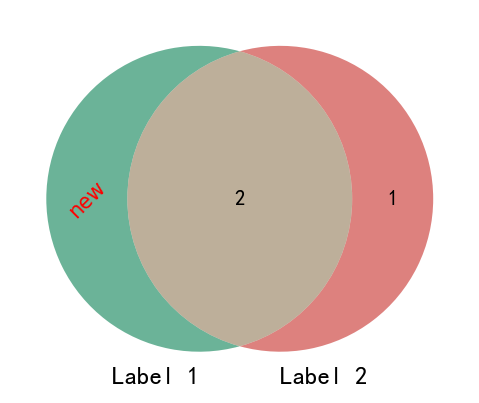

In [10]:
#单圈文本设置
#g.get_label_by_id("10")返回一个matplotlib.txet.Text对象，有诸多参数可以设置
my_dpi=150
plt.figure(figsize=(580/my_dpi, 580/my_dpi), dpi=my_dpi)
g=venn2(subsets = [{1,2,3},{1,2,4}],
        set_labels = ('Label 1', 'Label 2'),
        set_colors=("#098154","#c72e29"),
        alpha=0.6,
        normalize_to=1.0,
       )
g.get_label_by_id('10').set_fontfamily('Microsoft YaHei')#设置圈中字体
g.get_label_by_id('10').set_fontsize(10)#设置圈中字号
g.get_label_by_id('10').set_color("r")#设置圈中颜色
g.get_label_by_id('10').set_rotation(45)#设置圈中字的倾斜度
g.get_label_by_id('10').set_text("new")#设置圈中字的内容

#### venn3  
venn3：按照集合大小成比例分配图中面积    
venn3_unweighted：均使用默认面积  

In [11]:
from matplotlib_venn import venn3, venn3_unweighted

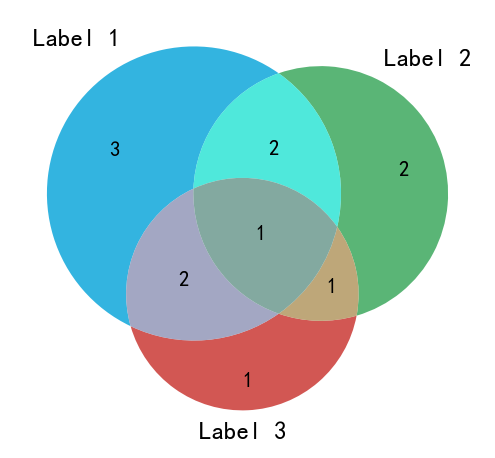

In [18]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)#控制图尺寸的同时，使图高分辨率（高清）显示
g=venn3(subsets = [{1,2,3,4,5,6,7,8},{1,2,4,9,10,11},{2,6,7,11,12}], #传入三组数据
        set_labels = ('Label 1', 'Label 2','Label 3'), #设置组名
        set_colors=("#01a2d9", "#31A354", "#c72e29"),#设置圈的颜色，中间颜色不能修改
        alpha=0.8,#透明度
        normalize_to=1.0,#venn图占据figure的比例，1.0为占满
       )
plt.show()

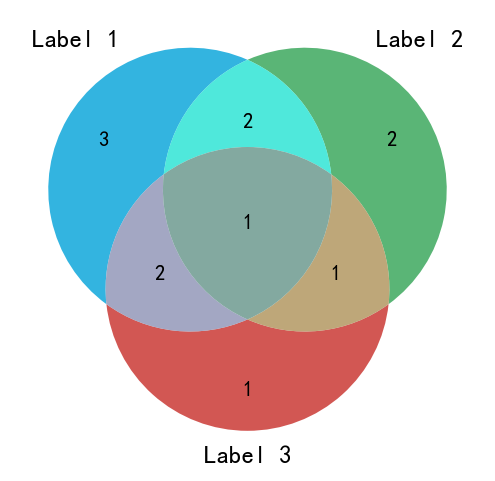

In [19]:
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)#控制图尺寸的同时，使图高分辨率（高清）显示
g=venn3_unweighted(subsets = [{1,2,3,4,5,6,7,8},{1,2,4,9,10,11},{2,6,7,11,12}], #传入三组数据
        set_labels = ('Label 1', 'Label 2','Label 3'), #设置组名
        set_colors=("#01a2d9", "#31A354", "#c72e29"),#设置圈的颜色，中间颜色不能修改
        alpha=0.8,#透明度
        normalize_to=1.0,#venn图占据figure的比例，1.0为占满
       )
plt.show()

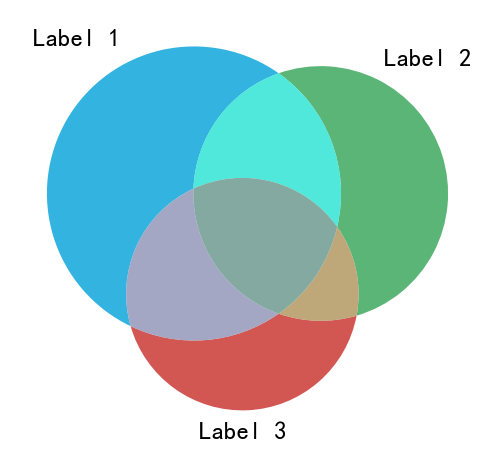

In [22]:
#批量设置label
my_dpi=150
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)#控制图尺寸的同时，使图高分辨率（高清）显示
g=venn3(subsets = [{1,2,3,4,5,6,7,8},{1,2,4,9,10,11},{2,6,7,11,12}], #传入三组数据
        set_labels = ('Label 1', 'Label 2','Label 3'), #设置组名
        set_colors=("#01a2d9", "#31A354", "#c72e29"),#设置圈的颜色，中间颜色不能修改
        alpha=0.8,#透明度
        normalize_to=1.0,#venn图占据figure的比例，1.0为占满
       )

labels = ['100', '101', '110', '010', '001', '011', '111']
for label in labels:
    g.get_label_by_id(label).set_text("")
plt.show()

## 连续型数据的可视化

### 直方图的绘制
数据的分布形态  
数据的集中区间  

plt.hist(x, bins=10, normed=False, orientation='vertical',color=None, label=None)  
x：指定绘制直方图的数据  
bins：指定直方图条形的个数  
normed：是否将直方图的频数转换为频率  
orientation：设置直方图的摆放方向，默认为垂直方向  
color：设置直方图的填充色  
edgecolor：设置直方图边框颜色  
label：设置直方图的标签，可通过lrgrnd展示图例  

In [18]:
titanic = pd.read_csv(r'./data_for_pandas/titanic_train.csv')
titanic.head()
titanic.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
#检查数据中是否有缺失值，并删除缺失值
any(titanic.Age.isnull())
titanic.dropna(subset=['Age'], inplace=True)
titanic.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

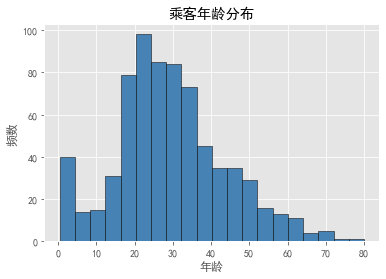

In [22]:
#绘制直方图
plt.hist(x=titanic.Age,
        bins=20,
        color='steelblue',
        edgecolor = 'black')

plt.xlabel('年龄')
plt.ylabel('频数')
plt.title('乘客年龄分布')
plt.show()

### 箱线图

 plt.boxplot(x, vert=None, whis=None, patch_artist=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None)  
x：指定要绘制箱线图的数据  
vert：是否需要将箱线图垂直摆放，默认垂直摆放  
whis：指定上下须与上下四分位的距离，默认为1.5倍的四分位差  
patch_artist：bool类型参数，是否填充箱体的颜色，默认为False  
meanline：bool类型参数，是否用线的形式表示均值，默认为False  
showmeans：bool类型参数，是否显示均值，默认False  
showcaps：bool类型参数，是否显示箱线图顶端和末端两条线（即上下须），默认为True  
showbox：bool类型参数，是否显示箱线图的箱体，默认为True  
showfliers：是否显示异常值，默认为True  
boxprops：设置箱体的属性，如边框色，填充色等  
labels：为箱线图添加标签，类似于图例的作用  
flierprops：设置异常值的属性，如异常点的形状、大小、填充色等  
medianprops：设置中位数的属性，如线的类型、粗细等  
meanprops：设置均值的属性，如点的大小、颜色等  
capprops：设置箱线图顶端和末端线条的属性，如颜色、粗细等  
whiskerprops：设置须得属性，如颜色、粗细、线得类型等  


In [26]:
sec_buildings = pd.read_excel("./data_for_pandas/sec_buildings.xlsx")
sec_buildings.head()
sec_buildings.price.head()

0    500
1    735
2    260
3    280
4    235
Name: price, dtype: int64

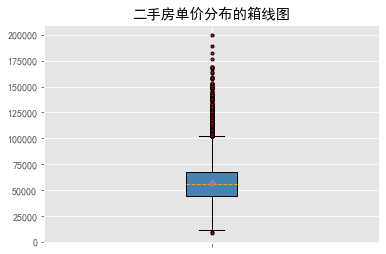

In [30]:
#绘制箱线图
plt.boxplot(x=sec_buildings.price_unit,#指定绘图数据 
           patch_artist=True, #要求用自定义颜色填充盒型图，默认为白色填充
           showmeans=True, #以点得形式，显示均值
           #设置箱体属性，边框色和填充色
           boxprops={'color':'black', 'facecolor':'steelblue'},
           #设置异常点得属性，如点得形状、填充色和点得大小
           flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':3},
           #设置均值点得属性，如点得形状、填充色和点的大小
           meanprops={'marker':'D', 'markerfacecolor':'indianred', 'markersize':4},
           #设置中位数线的属性，如线的类型和颜色
           medianprops = {'linestyle':'--', 'color':'orange'},
           labels=['']#删除x轴标签，否则图形显示刻度标签为1
           
           )
plt.title('二手房单价分布的箱线图')
plt.show()

### 折线图
时间序列数值，变量随着时间维度而进行的波动状态

plt.plot(x, y, linestyle, linewidth, color, marker, markersize, markeredgecolor, markerfacecolor, markeredgewidth, label, alpha)  
x：指定折线图的x轴数据  
y：指定折线图的y轴数据  
linestyle：指定折线的类型，可以是实线、虚线、点虚线、点点线等，默认为实线  
linewidth：指定折线的宽度  
marker：可以为折线图添加点，该参数是设置点的形状  
markersize：设置点的大小  
markeredgecolor：设置点的边框色  
markerfacecoler：设置点的填充色  
markeredgewidth：设置点的边框宽度
label：为折线图添加标签，类似于图例的作用  

In [31]:
wechat = pd.read_excel(r"./data_for_pandas/wechat.xlsx")
wechat.head()

,Date,Counts,Times
0,2017-10-01,399,763
1,2017-10-02,126,345
2,2017-10-03,76,249
3,2017-10-04,59,182
4,2017-10-05,60,165


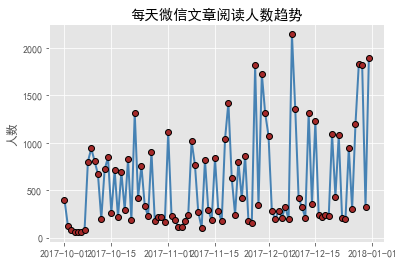

In [34]:
#绘制单条折线图 
plt.plot(wechat.Date,#x轴
         wechat.Counts,#y轴数据
         linestyle="-",#折线类型
         linewidth=2, #折线宽度
         color='steelblue',#折线颜色
         marker='o',#折线图中添加原点
         markersize=6,#设置点的大小
         markeredgecolor='black',#点的边框色
         markerfacecolor='brown' #点的填充色
        )
plt.ylabel('人数')
plt.title('每天微信文章阅读人数趋势')
plt.show()

Using matplotlib backend: agg


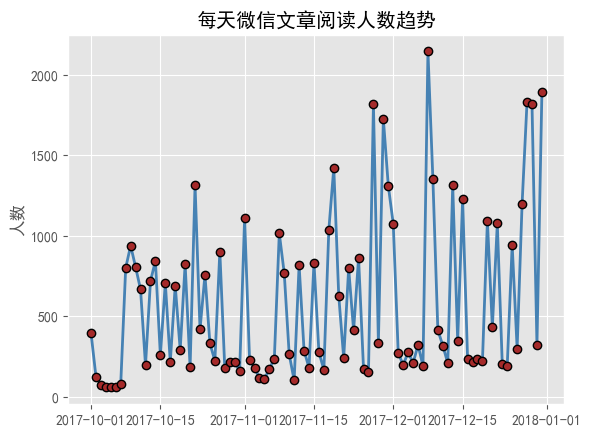

In [36]:
%matplotlib
plt.plot(wechat.Date,#x轴
         wechat.Counts,#y轴数据
         linestyle="-",#折线类型
         linewidth=2, #折线宽度
         color='steelblue',#折线颜色
         marker='o',#折线图中添加原点
         markersize=6,#设置点的大小
         markeredgecolor='black',#点的边框色
         markerfacecolor='brown' #点的填充色
        )
plt.ylabel('人数')
plt.title('每天微信文章阅读人数趋势')
plt.show()

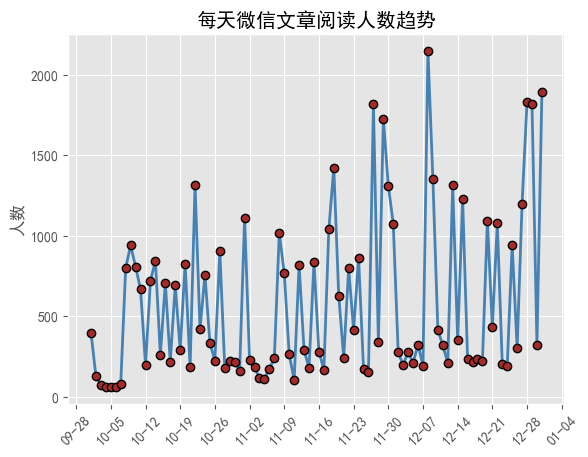

In [39]:
#解决日期过长的显示问题

import matplotlib as mpl
plt.plot(wechat.Date,
         wechat.Counts,
         linestyle="-",
         linewidth=2, 
         color='steelblue',
         marker='o',
         markersize=6,
         markeredgecolor='black',
         markerfacecolor='brown' 
        )

#获取图的坐标信息
ax = plt.gca()
#设置日期的显示格式
date_format = mpl.dates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)
#设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.Linerlocation(10)
#设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(xlocator)
#为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.xticks(rotation=45)

plt.ylabel('人数')
plt.title('每天微信文章阅读人数趋势')
plt.show()

## 关系型数据可视化

### 散点图
研究两个数值型变量之间的关系

scatter(x, y, s=20, c=None, marker='o', alphs=None, linewidths=None, edgecolors=None)  
x：指定散点图x轴的数据  
y：指定散点图y轴数据  
s：指定散点图点的大小，默认为20， 通过传入其他数值型变量，可以实现气泡图的绘制  
c：指定散点图点的颜色，默认为蓝色，也可以传递其他数值型变量，通过cmap参数的色阶表示数值大小  
marker：指定散点图的形状，默认为空心圆  
alpha：设置散点的透明度  
linewidths：设置点的边界线的宽度  
edgecolors：设置散点的边界线的颜色  

In [40]:
iris = pd.read_csv(r"./data_for_pandas/iris.csv")
iris.Petal_Width.head()
iris.Petal_Length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: Petal_Length, dtype: float64

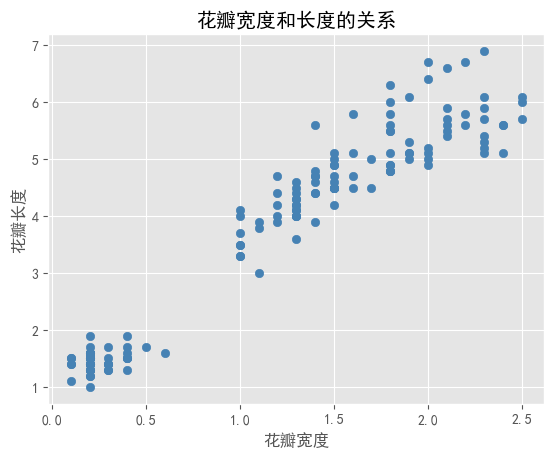

In [41]:
#绘制散点图
plt.scatter(x=iris.Petal_Width,
            y=iris.Petal_Length,
            color='steelblue'
           )
plt.xlabel('花瓣宽度')
plt.ylabel('花瓣长度')
plt.title('花瓣宽度和长度的关系')
plt.show()

### 气泡图
气泡图的实质就是通过第三个数值型变量，控制每个散点的大小，点越大，代表的第三维数值越高

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
prod_category = pd.read_excel(r'./data_for_pandas/SuperMarket.xlsx')
prod_category.head()

,Category,Sub_Category,Profit,Sales,Profit_Ratio
0,办公用品,信封,49241.5600,176861.52,0.278419
1,办公用品,剪刀，尺子，锯,-7953.5700,80800.03,-0.098435
2,办公用品,夹子及其配件,306455.2895,1026410.56,0.298570
3,办公用品,家用电器,100258.3200,742663.39,0.134998
4,办公用品,容器，箱子,10068.2100,1112252.53,0.009052


In [7]:
#将利润率标准化到(0， 1]之间，因为利润率中有负数，然后加上微小的数值0.001（气泡图中s参数对应的变量必须大于0）
range_diff = prod_category.Profit_Ratio.max() - prod_category.Profit_Ratio.min()
range_diff
prod_category['Profit_Ratio'] = (prod_category.Profit_Ratio - prod_category.Profit_Ratio.min()) / range_diff + 0.001
prod_category.Profit_Ratio.head()

0    0.839328
1    0.001000
2    0.884155
3    0.520283
4    0.240110
Name: Profit_Ratio, dtype: float64

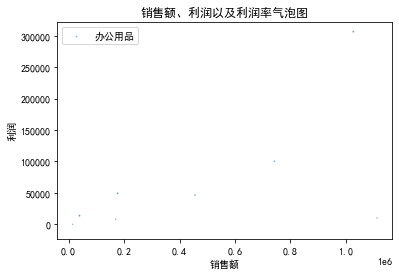

In [10]:
#绘制办公室用品的气泡图
plt.scatter(x=prod_category.Sales[prod_category.Category=="办公用品"],
            y=prod_category.Profit[prod_category.Category=="办公用品"],
            s=prod_category.Profit_Ratio[prod_category.Category=="办公用品"],
            color="steelblue", label='办公用品', alpha=0.6
           )
plt.xlabel('销售额')
plt.ylabel('利润')
plt.title('销售额、利润以及利润率气泡图')
plt.legend()#显示图例
plt.show()

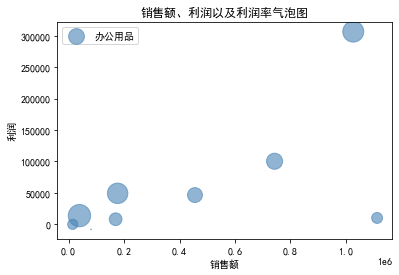

In [11]:
#利润率数值太小，画出的气泡都太小。所以进行成比例扩大，比如500倍
plt.scatter(x=prod_category.Sales[prod_category.Category=="办公用品"],
            y=prod_category.Profit[prod_category.Category=="办公用品"],
            s=prod_category.Profit_Ratio[prod_category.Category=="办公用品"]*500,
            color="steelblue", label='办公用品', alpha=0.6
           )
plt.xlabel('销售额')
plt.ylabel('利润')
plt.title('销售额、利润以及利润率气泡图')
plt.legend()#显示图例
plt.show()

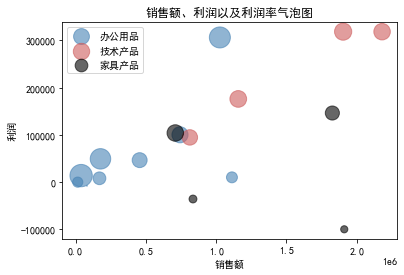

In [14]:
#使用循环方式，添加其他的图
list_category = ['办公用品','技术产品','家具产品']
list_color = ['steelblue', 'indianred', 'black']
for time in range(len(list_color)):
    plt.scatter(x=prod_category.Sales[prod_category.Category==list_category[time]],
                y=prod_category.Profit[prod_category.Category==list_category[time]],
                s=prod_category.Profit_Ratio[prod_category.Category==list_category[time]]*500,
                color=list_color[time], label=list_category[time], alpha=0.6
               )
plt.xlabel('销售额')
plt.ylabel('利润')
plt.title('销售额、利润以及利润率气泡图')
plt.legend()#显示图例
plt.show()

### 热力图
交叉填充图，离散变量之间的组合表

In [42]:
import seaborn as sns

sns.heatmap(data, cmap=None, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white')  
data：绘制热力图的数据集  
cmap：指定一个colomap对象，用于热力图的填充色  
annot：指定一个bool类型的值或与data参数形状的数组，如果为True，就在热力图的每个单元上显示数值  
fmt：指定单元格中数据的显示格式  
annot_kws：有关单元格中数值标签的其他属性描述，如颜色、大小等  
linewidths：指定每个单元格的边框宽度  
linecolor：指定每个单元格的边框颜色  


In [43]:
sales = pd.read_excel(r"./data_for_pandas/Sales.xlsx")
sales.head()

,Date,Sales
0,2010-10-13,261.5400
1,2012-02-20,6.0000
2,2011-07-15,2808.0800
3,2011-07-15,1761.4000
4,2011-07-15,160.2335


In [46]:
sales.Date.head()

0   2010-10-13
1   2012-02-20
2   2011-07-15
3   2011-07-15
4   2011-07-15
Name: Date, dtype: datetime64[ns]

In [53]:
#根据交易日期，衍生出年份和月份字段
sales['year'] = sales.Date.dt.year
sales['month'] = sales.Date.dt.month
sales.head()

,Date,Sales,year,month
0,2010-10-13,261.5400,2010,10
1,2012-02-20,6.0000,2012,2
2,2011-07-15,2808.0800,2011,7
3,2011-07-15,1761.4000,2011,7
4,2011-07-15,160.2335,2011,7


In [54]:
import numpy as np
#统计每年各月份的销售总额（绘制热力图之前，必须将数据转换为交叉表形式）
summary = sales.pivot_table(index='month', columns='year', values='Sales', aggfunc=np.sum)
summary


year,2009,2010,2011,2012
month,,,,
1,520452.5595,334535.0605,255919.2030,341339.2470
2,333909.5565,271881.9480,299890.1410,281270.1790
3,411628.7290,217808.0065,296151.7510,387093.7650
4,406848.7620,266968.5890,290384.4670,278402.9940
5,228025.5680,287796.5150,264673.6260,384588.0615
6,273758.8780,293600.7750,196918.1455,316775.7855
7,412797.4600,240297.1585,287905.1865,275160.0495
8,329754.7150,205789.6440,275211.3295,306671.2835
9,325292.3145,419689.7785,278230.1660,319675.1765


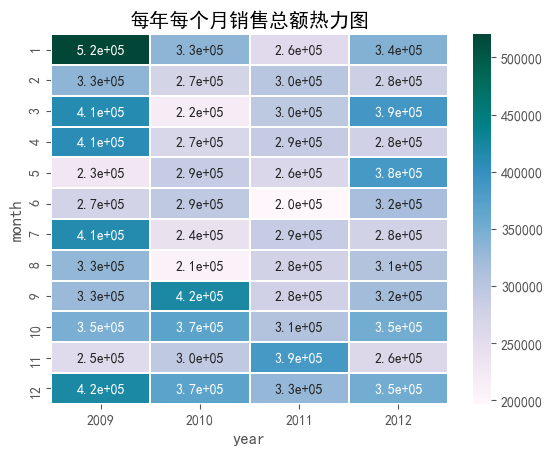

In [58]:
#绘制热力图
sns.heatmap(data=summary,
            cmap='PuBuGn',#设置填充色
            linewidths=0.1,#设置每个单元格边框的宽度
            annot=True,#显示数值
            fmt ='.1e'#以科学计数法显示数据
           )
plt.title('每年每个月销售总额热力图')
plt.show()

## 多图形组合

plt.subplot2grid(shape, loc, rowspan=1, colspan=1, kwargs)  
shape：指定组合图的框架形状，以元组的形式传递，如2\*3的矩阵可以表示为（2，3）  
loc：指定子图所在的位置， 如shape中第一行第一列可以表示为（0，0）  
rowspan：指定某个子图需要跨几行  
colspan：指定某个子图需要跨几列  

In [ ]:
#设置大图框的长和高
plt.figure(figsize=(12, 6))

#设置第一个子图的布局
ax1=plt.subplot2grid(shape=(2,3), loc=(0, 0))

#设置第二个子图的布局
ax2=plt.subplot2grid(shape=(2, 3), loc=(0, 1))

#设置第三个子图的布局
ax3=plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=2)

#设置第四个子图的布局
ax4=plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=2)

In [46]:
#读取数据
prod_trade = pd.read_excel(r'./data_for_pandas/Prod_Trade.xlsx')
prod_trade.head()

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子


In [47]:
class_counts = prod_trade.Order_Class[prod_trade.year=='2012'].value_counts()
class_percent = class_counts/class_counts.sum()

AttributeError: 'DataFrame' object has no attribute 'year'

In [48]:
#衍生出交易年份和月份字段
prod_trade['year'] = prod_trade.Date.dt.year
prod_trade.year.head()
prod_trade['month'] = prod_trade.Date.dt.month
prod_trade.month.head()

0    10
1     2
2     7
3     7
4     7
Name: month, dtype: int64

In [59]:
class_counts = prod_trade.Order_Class[prod_trade.year==2012].value_counts()
class_counts
class_percent = class_counts/class_counts.sum()
class_percent

中级    0.378865
高级    0.214121
低级    0.210429
其它    0.196585
Name: Order_Class, dtype: float64

In [60]:
class_counts

中级    821
高级    464
低级    456
其它    426
Name: Order_Class, dtype: int64

In [37]:
prod_trade.Date.dt.year.head()

0    2010
1    2012
2    2011
3    2011
4    2011
Name: Date, dtype: int64

In [38]:
prod_trade.year.head()

0    2010
1    2012
2    2011
3    2011
4    2011
Name: year, dtype: int64

/mnt/d/WSL/conda/miniconda3/envs/normal/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if sys.path[0] == '':
/mnt/d/WSL/conda/miniconda3/envs/normal/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/mnt/d/WSL/conda/miniconda3/envs/normal/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexi

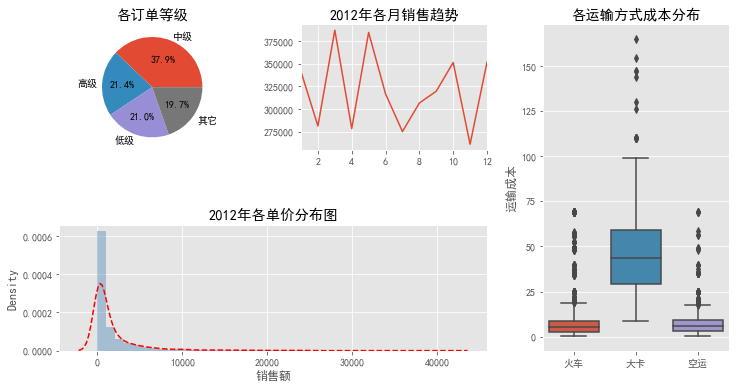

In [74]:
plt.style.use('ggplot')
#设置大图框的长和高
plt.figure(figsize=(12,6))

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
#统计2012年各订单等级的数量
class_counts = prod_trade.Order_Class[prod_trade.year==2012].value_counts()
class_percent = class_counts/class_counts.sum()

#将图设置为圆形
#ax1.set_aspect(aspect='equal')
ax1.pie(x=class_percent.values, labels=class_percent.index, autopct='%.1f%%')

ax1.set_title('各订单等级')


ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
#统计2012年每个月销售额
month_sales = prod_trade[prod_trade.year==2012].groupby(by='month').aggregate({'Sales':np.sum})
month_sales.plot(title='2012年各月销售趋势', ax=ax2, legend=False)
#使用set_function修改
ax2.set_xlim(1, 12)
ax2.set_xlabel('')


ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=2)
sns.boxplot(x='Transport', y='Trans_Cost', data=prod_trade, ax=ax3)
ax3.set_title('各运输方式成本分布')
ax3.set_xlabel('')
ax3.set_ylabel('运输成本')


ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), colspan=2)
sns.distplot(prod_trade.Sales[prod_trade.year==2012], bins=40, norm_hist=True, ax=ax4, hist_kws={'color':'steelblue'}, kde_kws={'linestyle':'--', 'color':'red'})
ax4.set_title('2012年各单价分布图')
ax4.set_xlabel('销售额')

#调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()